In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
productos_a_predecir = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')
prediccion_202002 = pd.read_csv('../data/submission_statsforecast.csv', sep=',')


In [81]:
# Copiar la columna tn de sell_in filtrados por periodo igual a 201912 en una nueva columna en productos_a_predecir donde coincidan los product_id y sumarice los valores de tn

# Filtrar sell_in por periodo 201910
sell_in_201910 = sell_in[sell_in['periodo'] <= 201910]
sell_in_201912 = sell_in[sell_in['periodo'] == 201912]
# Sumarizar tn por product_id
#sell_in_201910_agg = sell_in_201910.groupby('product_id', as_index=False)['tn'].sum()

#productos_a_predecir_nuevo = productos_a_predecir.merge(sell_in[['product_id', 'tn']], on='product_id', how='left')

In [82]:
sell_in_201912
# 5) Agrupar por producto + mes
ventas_agrupadas_201912 = (
    sell_in_201912
    .groupby(['product_id'], as_index=False)['tn']
    .sum()
    .sort_values(['product_id'])
)
ventas_agrupadas_201912

,product_id,tn
0,20001,1504.68856
1,20002,1087.30855
2,20003,892.50129
3,20004,637.90002
4,20005,593.24443
...,...,...
922,21265,0.05007
923,21266,0.05121
924,21267,0.01569
925,21271,0.00298


In [83]:
# Filtrar productos en cada período
productos_201910 = sell_in_201910['product_id'].unique() 
productos_201912 = sell_in_201912['product_id'].unique()

# Intersección de productos
productos_comunes = set(productos_201910) & set(productos_201912)

# Filtrar el dataset original para quedarte solo con productos comunes del 201910
dataset_filtrado = sell_in[(sell_in['periodo'] <= 201910) & (sell_in['product_id'].isin(productos_comunes))]

In [84]:
dataset_filtrado

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452
...,...,...,...,...,...,...,...
2814448,201910,10110,20853,0,1,0.00669,0.00669
2814449,201910,10321,20853,0,1,0.00446,0.00446
2814450,201910,10443,20853,0,1,0.11148,0.11148
2814451,201910,10086,20853,0,2,0.02007,0.02007


In [85]:
# contar productos_comunes
num_productos_comunes = len(productos_comunes)
print(f"Número de productos comunes entre 201910 y 201912: {num_productos_comunes}")

Número de productos comunes entre 201910 y 201912: 923


In [86]:
# Filtrar de dataset_filtrado aquellos productos que tienen dentro de 201910, 201909 y 201908 el campo tn > 0
df_3meses = dataset_filtrado[dataset_filtrado['periodo'].isin([201907, 201908, 201909])]

# Filtrar solo los productos de interés (ya en dataset_filtrado)
productos_interes = dataset_filtrado['product_id'].unique()
df_3meses = df_3meses[df_3meses['product_id'].isin(productos_interes)]

# Agrupar por producto y contar en cuántos períodos tiene tn > 0
productos_validos = (
    df_3meses[df_3meses['tn'] > 0]
    .groupby('product_id')['periodo']
    .nunique()
    .reset_index()
)

# Quedarse solo con productos que tengan tn > 0 en los 3 períodos
productos_validos = productos_validos[productos_validos['periodo'] == 3]['product_id']

# Filtrar dataset_filtrado por los productos que cumplen la condición
dataset_final = dataset_filtrado[dataset_filtrado['product_id'].isin(productos_validos)]

In [87]:
productos_validos

0      20001
1      20002
2      20003
3      20004
4      20005
       ...  
881    21265
882    21266
883    21267
884    21271
885    21276
Name: product_id, Length: 857, dtype: int64

In [88]:
# Filtrar prediccion_202002 con tn > 0
prediccion_202002 = prediccion_202002[prediccion_202002['tn'] > 0]
prediccion_202002

,product_id,tn
0,20001,1488.1181
1,20002,1350.2658
2,20003,853.7236
3,20004,511.3371
4,20005,469.1073
...,...,...
775,21263,0.0127
776,21265,0.0895
777,21266,0.0947
778,21267,0.0928


In [89]:
# Obtener un dataset con los prouctos de productos_validos que estén en prediccion_202002
productos_201910= prediccion_202002[prediccion_202002['product_id'].isin(productos_validos)]

In [90]:
productos_201910

,product_id,tn
0,20001,1488.1181
1,20002,1350.2658
2,20003,853.7236
3,20004,511.3371
4,20005,469.1073
...,...,...
775,21263,0.0127
776,21265,0.0895
777,21266,0.0947
778,21267,0.0928


In [91]:
# Obtener de sell_in_201910 aquellos productos que estén en productos_201910
sell_in_201910 = sell_in_201910[sell_in_201910['product_id'].isin(productos_201910['product_id'])]
sell_in_201910 

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452
...,...,...,...,...,...,...,...
2814448,201910,10110,20853,0,1,0.00669,0.00669
2814449,201910,10321,20853,0,1,0.00446,0.00446
2814450,201910,10443,20853,0,1,0.11148,0.11148
2814451,201910,10086,20853,0,2,0.02007,0.02007


In [63]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

np.random.seed(26790882)



# 1) Cargar archivos
sell_in = sell_in_201910
productos_a_predecir = sell_in_201910['product_id'].unique()

# 2) Limpiar nombres de columnas
#sell_in.columns = sell_in.columns.str.strip()
#productos_a_predecir.columns = productos_a_predecir.columns.str.strip()

# 3) Convertir 'periodo' a datetime (formato YYYYMM → datetime mensual)
sell_in['periodo'] = sell_in['periodo'].astype(str).astype(int)
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'], format='%Y%m')

# 4) Filtrar sólo los productos que hay que predecir
#sell_in = sell_in[sell_in['product_id'].isin(productos_a_predecir['product_id'])]

# 5) Agrupar por producto + mes
ventas_agrupadas = (
    sell_in
    .groupby(['product_id', 'periodo'], as_index=False)['tn']
    .sum()
    .sort_values(['product_id', 'periodo'])
)

# 6) Preparar lista para resultados
resultados = []

# 7) Para cada producto, aplicar promedio o AutoARIMA de statsforecast
for producto in tqdm(productos_a_predecir, desc="Pronosticando con statsforecast"):
    # Extraer la serie histórica de "tn" para ese producto
    df_prod = ventas_agrupadas[ventas_agrupadas['product_id'] == producto].copy()
    # Renombrar columnas para cumplir con StatsForecast
    df_prod = df_prod[['periodo', 'tn']].rename(columns={'periodo': 'ds', 'tn': 'y'})
    df_prod = df_prod.sort_values('ds')
    
    # Número de meses disponibles
    n_obs = df_prod.shape[0]
    
    # Caso 1: menos de 12 meses → promedio simple
    if n_obs < 12 or df_prod['y'].sum() == 0 or df_prod['y'].nunique() == 1:
        forecast = float(df_prod['y'].mean()) if n_obs > 0 else 0.0
        
    else:
        # Crear modelo AutoARIMA dentro de statsforecast
        #   seasonal=True y season_length=12 para estacionalidad anual en datos mensuales
        modelo = AutoARIMA(
            seasonal=True,
            season_length=12
        )
        # Preparar DataFrame con unique_id, ds y y
        tmp = pd.DataFrame({
            'unique_id': ['serie'] * len(df_prod),
            'ds': df_prod['ds'].values,
            'y': df_prod['y'].values
        })
        # Inicializar StatsForecast sin pasar df en el constructor
        sf = StatsForecast(
            models=[modelo],
            freq='MS'  # mensual (Month Start)
        )
        # Ajustar y predecir h=1 pasando tmp a forecast()
        pron = sf.forecast(df=tmp, h=1)
        # Extraer el pronóstico desde la columna "AutoARIMA"
        forecast = float(pron['AutoARIMA'].iloc[0])
    
    # Asegurar que no sea negativo
    forecast = max(forecast, 0.0)
    resultados.append({'product_id': producto, 'tn': round(forecast, 4)})

# 8) Crear DataFrame final y exportar
df_forecast = pd.DataFrame(resultados)
df_forecast.to_csv('../data/submission_statsforecast_201910.csv', index=False)
print("✅ Archivo submission_statsforecast_201910.csv generado correctamente.")


Pronosticando con statsforecast: 100%|██████████| 744/744 [02:24<00:00,  5.13it/s] 

✅ Archivo submission_statsforecast_201910.csv generado correctamente.


In [66]:
df_forecast

,product_id,tn
0,20524,7.4544
1,20311,20.9492
2,20654,3.3754
3,20828,2.5061
4,20941,0.5587
...,...,...
739,20261,82.0688
740,20236,122.4484
741,20886,4.8929
742,20845,8.8054


In [98]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import numpy as np

# Variables para regresión
X = df_comparado['tn_real'].values.reshape(-1, 1)
y = df_comparado['tn_pred'].values

# Ajustar modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Generar puntos para la línea de regresión
x_line = np.linspace(df_comparado['tn_real'].min(), df_comparado['tn_real'].max(), 100)
y_line = modelo.predict(x_line.reshape(-1, 1))

# Crear figura con puntos + línea
fig = go.Figure()

# Scatter con hover interactivo
fig.add_trace(go.Scatter(
    x=df_comparado['tn_real'],
    y=df_comparado['tn_pred'],
    mode='markers',
    marker=dict(size=8, opacity=0.6),
    text=df_comparado['product_id'],  # texto visible al hacer hover
    hovertemplate='Producto: %{text}<br>Reales: %{x:.2f}<br>Predichas: %{y:.2f}',
    name='Productos'
))

# Línea de regresión
fig.add_trace(go.Scatter(
    x=x_line,
    y=y_line,
    mode='lines',
    line=dict(color='red'),
    name='Línea de regresión'
))

# Layout
fig.update_layout(
    title='Regresión Interactiva: Toneladas Reales vs. Predichas',
    xaxis_title='Toneladas Reales',
    yaxis_title='Toneladas Predichas',
    template='plotly_white',
    width=800,
    height=600
)

fig.show()


In [99]:
# Normalizar tamaños para que no sean desproporcionados
import numpy as np

# Usamos tn_real como base para el tamaño (y evitamos ceros o valores extremos)
sizes = df_comparado['tn_real']
sizes_scaled = 10 + 40 * (sizes - sizes.min()) / (sizes.max() - sizes.min())  # escala de 10 a 50

# Puntos con tamaño proporcional a tn_real
fig.add_trace(go.Scatter(
    x=df_comparado['tn_real'],
    y=df_comparado['tn_pred'],
    mode='markers',
    marker=dict(
        size=sizes_scaled,
        opacity=0.6,
        color='blue'
    ),
    text=df_comparado['product_id'],
    hovertemplate='Producto: %{text}<br>Reales: %{x:.2f}<br>Predichas: %{y:.2f}<br>Tamaño: %{marker.size:.0f}',
    name='Productos'
))


In [70]:
sell_in

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,2017-01-01,10234,20524,0,2,0.05300,0.05300
1,2017-01-01,10032,20524,0,1,0.13628,0.13628
2,2017-01-01,10217,20524,0,1,0.03028,0.03028
3,2017-01-01,10125,20524,0,1,0.02271,0.02271
4,2017-01-01,10012,20524,0,11,1.54452,1.54452
...,...,...,...,...,...,...,...
2814448,2019-10-01,10110,20853,0,1,0.00669,0.00669
2814449,2019-10-01,10321,20853,0,1,0.00446,0.00446
2814450,2019-10-01,10443,20853,0,1,0.11148,0.11148
2814451,2019-10-01,10086,20853,0,2,0.02007,0.02007


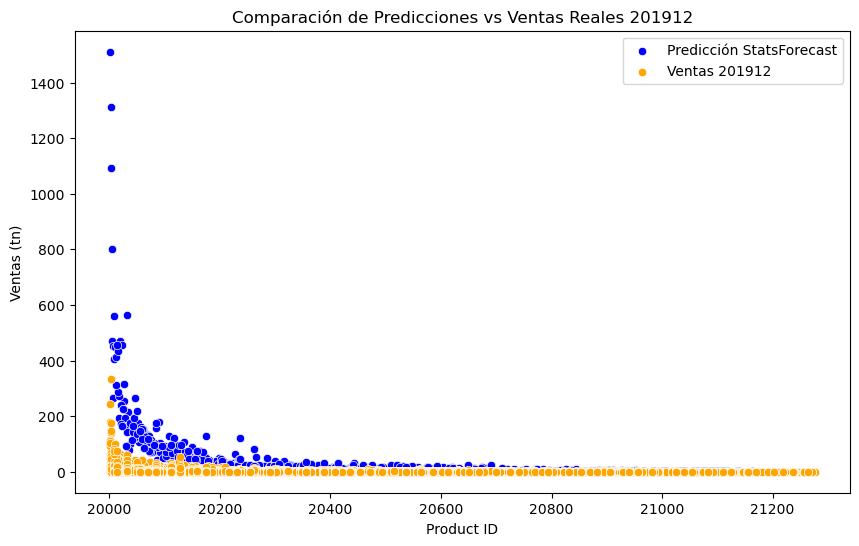

In [ ]:
# Graficar en un scatterplot de las ventas de df_forecast vs las ventas de prodcutos de sell_in vendidos en 201912 efectivamente




Para abajo no sirve NADA

In [20]:
#exportar el resultado a un archivo CSV
productos_a_predecir_nuevo.to_csv('../data/productos_a_predecir_nuevo.csv', index=False)   

In [36]:
# Filtrar sell_in por periodo 201912, 201911 y 201910 y promediar tn por product_id
sell_in_3meses = sell_in[sell_in['periodo'].isin([201912, 201911, 201910])]
promedios_tn = sell_in_3meses.groupby('product_id')['tn'].mean()

In [46]:
sell_in_3meses

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
2737829,201910,10013,20524,0,3,0.03028,0.03028
2737830,201910,10291,20524,0,1,0.07571,0.07571
2737831,201910,10002,20524,0,4,0.12871,0.12871
2737832,201910,10159,20524,0,3,0.03028,0.03028
2737833,201910,10005,20524,0,6,0.10600,0.10600
...,...,...,...,...,...,...,...
2945813,201912,10105,20853,0,1,0.02230,0.02230
2945814,201912,10092,20853,0,1,0.00669,0.00669
2945815,201912,10006,20853,0,7,0.02898,0.02898
2945816,201912,10018,20853,0,4,0.01561,0.01561


In [44]:
promedios_tn_3meses = (
    sell_in_3meses
    .groupby('product_id')['tn']
    .mean()
    .reset_index()
    .rename(columns={'tn': 'promedio_tn_3meses'})
)

In [45]:
promedios_tn_3meses

,product_id,promedio_tn_3meses
0,20001,9.703405
1,20002,11.282468
2,20003,5.641239
3,20004,4.436085
4,20005,4.796810
...,...,...
954,21266,0.013921
955,21267,0.008498
956,21269,0.007568
957,21271,0.003117


In [33]:
productos_a_predecir_3meses = productos_a_predecir.merge(promedios_tn, on='product_id', how='left')
print(productos_a_predecir_3meses)

     product_id         tn
0         20001   9.703405
1         20002  11.282468
2         20003   5.641239
3         20004   4.436085
4         20005   4.796810
..          ...        ...
775       21263   0.004335
776       21265   0.014080
777       21266   0.013921
778       21267   0.008498
779       21276   0.003156

[780 rows x 2 columns]


In [28]:
productos_a_predecir_3meses.to_csv('../data/productos_a_predecir_nuevo_3meses.csv', index=False)

In [74]:
# Paso 1: Filtrar solo los tres meses
meses_objetivo = [201910, 201911, 201912]
sell_in_filtrado = sell_in[sell_in['periodo'].isin(meses_objetivo)]

# Paso 2: Agregar por product_id y periodo, sumando tn por mes
ventas_mensuales = (
    sell_in_filtrado
    .groupby(['product_id', 'periodo'], as_index=False)
    .agg(tn_mensual=('tn', 'sum'))
)

# Paso 3: Ahora sí, calcular el promedio por producto (máximo 3 valores)
promedios_tn_3meses = (
    ventas_mensuales
    .groupby('product_id', as_index=False)
    .agg(
        tn=('tn_mensual', 'mean'),
        #cantidad_meses_con_dato=('tn_mensual', 'count')
    )
)
promedios_tn_3meses = productos_a_predecir.merge(promedios_tn_3meses, on='product_id', how='left')

In [75]:
promedios_tn_3meses

,product_id,tn
0,20001,1487.855463
1,20002,1496.807430
2,20003,974.053890
3,20004,808.846137
4,20005,732.312970
...,...,...
775,21263,0.020230
776,21265,0.075093
777,21266,0.078883
778,21267,0.050990


In [76]:
promedios_tn_3meses.to_csv('../data/productos_a_predecir_nuevo_3meses.csv', index=False)

In [ ]:
# Paso 1: Filtrar solo los tres meses
meses_objetivo = [201907,201908,201909,201910, 201911, 201912]
sell_in_filtrado = sell_in[sell_in['periodo'].isin(meses_objetivo)]

# Paso 2: Agregar por product_id y periodo, sumando tn por mes
ventas_mensuales = (
    sell_in_filtrado
    .groupby(['product_id', 'periodo'], as_index=False)
    .agg(tn_mensual=('tn', 'sum'))
)

# Paso 3: Ahora sí, calcular el promedio por producto (máximo 3 valores)
promedios_tn_6meses = (
    ventas_mensuales
    .groupby('product_id', as_index=False)
    .agg(
        tn=('tn_mensual', 'mean'),
        #cantidad_meses_con_dato=('tn_mensual', 'count')
    )
)
promedios_tn_6meses = productos_a_predecir.merge(promedios_tn_6meses, on='product_id', how='left')

In [78]:
promedios_tn_6meses.to_csv('../data/productos_a_predecir_nuevo_6meses.csv', index=False)

In [ ]:
# Paso 1: Filtrar solo los tres meses
meses_objetivo = [201904,201905,201906,201907,201908,201909,201910, 201911, 201912]
sell_in_filtrado = sell_in[sell_in['periodo'].isin(meses_objetivo)]

# Paso 2: Agregar por product_id y periodo, sumando tn por mes
ventas_mensuales = (
    sell_in_filtrado
    .groupby(['product_id', 'periodo'], as_index=False)
    .agg(tn_mensual=('tn', 'sum'))
)

# Paso 3: Ahora sí, calcular el promedio por producto (máximo 3 valores)
promedios_tn_9meses = (
    ventas_mensuales
    .groupby('product_id', as_index=False)
    .agg(
        tn=('tn_mensual', 'mean'),
        #cantidad_meses_con_dato=('tn_mensual', 'count')
    )
)
promedios_tn_9meses = productos_a_predecir.merge(promedios_tn_9meses, on='product_id', how='left')

In [80]:
promedios_tn_9meses.to_csv('../data/productos_a_predecir_nuevo_9meses.csv', index=False)

In [87]:
# Paso 1: Filtrar solo los tres meses
meses_objetivo = [201901,201902,201903,201904,201905,201906,201907,201908,201909,201910, 201911, 201912]
sell_in_filtrado = sell_in[sell_in['periodo'].isin(meses_objetivo)]

# Paso 2: Agregar por product_id y periodo, sumando tn por mes
ventas_mensuales = (
    sell_in_filtrado
    .groupby(['product_id', 'periodo'], as_index=False)
    .agg(tn_mensual=('tn', 'sum'))
)

# Paso 3: Ahora sí, calcular el promedio por producto (máximo 3 valores)
promedios_tn_12meses = (
    ventas_mensuales
    .groupby('product_id', as_index=False)
    .agg(
        tn=('tn_mensual', 'mean'),
        #cantidad_meses_con_dato=('tn_mensual', 'count')
    )
)
promedios_tn_12meses = productos_a_predecir.merge(promedios_tn_12meses, on='product_id', how='left')

In [88]:
promedios_tn_12meses.to_csv('../data/productos_a_predecir_nuevo_12meses.csv', index=False)

In [89]:
import pandas as pd

# Cargar el archivo base del promedio de 3 meses
base = pd.read_csv('../data/productos_a_predecir_nuevo_12meses.csv')

# Crear variantes multiplicadas
variantes = {
    'submission_promedio_ultimos12_x098.csv': 0.98,
    'submission_promedio_ultimos12_x099.csv': 0.99,
    'submission_promedio_ultimos12_x101.csv': 1.01,
    'submission_promedio_ultimos12_x102.csv': 1.02
}

# Generar y guardar cada variante
for nombre_archivo, factor in variantes.items():
    df_modificado = base.copy()
    df_modificado['tn'] = df_modificado['tn'] * factor
    df_modificado.to_csv(f'../data/{nombre_archivo}', index=False)

print("✅ Variantes generadas y guardadas correctamente.")

✅ Variantes generadas y guardadas correctamente.


In [99]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm

np.random.seed(26790882)
# Cargar archivos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
productos_a_predecir = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')

# Limpiar columnas
sell_in.columns = sell_in.columns.str.strip()
productos_a_predecir.columns = productos_a_predecir.columns.str.strip()

# Convertir periodo a string y luego a datetime con formato año-mes
sell_in['periodo'] = sell_in['periodo'].astype(str)
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'], format='%Y%m')

# Filtrar productos a predecir
sell_in = sell_in[sell_in['product_id'].isin(productos_a_predecir['product_id'])]

# Agrupar por producto y periodo
ventas_agrupadas = (
    sell_in
    .groupby(['product_id', 'periodo'])['tn']
    .sum()
    .reset_index()
    .sort_values(['product_id', 'periodo'])
)

# Lista para guardar predicciones
resultados = []

# Predicción ARIMA por producto
for producto in tqdm(productos_a_predecir['product_id']):
    serie = ventas_agrupadas[ventas_agrupadas['product_id'] == producto]
    serie = serie.set_index('periodo')
    ts = serie['tn']

    # Validaciones mínimas
    if ts.isnull().any() or len(ts) < 6 or ts.sum() == 0 or ts.nunique() == 1:
        forecast = 0
    else:
        try:
            model = ARIMA(ts, order=(1, 1, 1))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=1)[0]
            forecast = max(forecast, 0)
        except:
            forecast = 0

    resultados.append({'product_id': producto, 'tn': forecast})

# Guardar resultados
df_forecast = pd.DataFrame(resultados)
df_forecast.to_csv('../data/submission_arima.csv', index=False)
print("✅ Archivo submission_arima.csv generado correctamente.")

  0%|          | 0/780 [00:00<?, ?it/s]c:\Users\m_sam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\m_sam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\m_sam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\2129111309.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = model_fit.forecast(steps=1)[0]

✅ Archivo submission_arima.csv generado correctamente.


In [101]:
!pip install pmdarima 

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------------------- -------- 2.1/2.7 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.2 MB/s eta 0:00:00


In [104]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Importar auto_arima de pmdarima
import pmdarima as pm

np.random.seed(26790882)

# 1) Cargar datos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
productos_a_predecir = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')

# 2) Limpiar columnas y parsear periodo
sell_in.columns = sell_in.columns.str.strip()
productos_a_predecir.columns = productos_a_predecir.columns.str.strip()

sell_in['periodo'] = sell_in['periodo'].astype(str)
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'], format='%Y%m')

# 3) Filtrar solo los productos que queremos predecir
sell_in = sell_in[sell_in['product_id'].isin(productos_a_predecir['product_id'])]

# 4) Agrupar por producto y periodo sumando toneladas
ventas_agrupadas = (
    sell_in
    .groupby(['product_id', 'periodo'])['tn']
    .sum()
    .reset_index()
    .sort_values(['product_id', 'periodo'])
)

# 5) Preparar lista para resultados
resultados = []

# 6) Bucle: para cada producto, construir la serie y aplicar auto_arima
for producto in tqdm(productos_a_predecir['product_id']):
    serie = ventas_agrupadas[ventas_agrupadas['product_id'] == producto]
    serie = serie.set_index('periodo')
    ts = serie['tn']
    
    # Validaciones mínimas
    if ts.isnull().any() or len(ts) < 6 or ts.sum() == 0 or ts.nunique() == 1:
        forecast = 0.0
    else:
        try:
            # 6.1) Ajustar auto_arima sobre la serie histórica
            #      Ajustamos (p,d,q) en rangos razonables:
            modelo_aa = pm.auto_arima(
                ts,
                start_p=0, start_q=0,
                max_p=3, max_q=3,
                seasonal=True,       # Si tu serie no tiene estacionalidad marcada almacenarFalse
                d=None,               # Deja que auto_arima estime d (diferenciación)
                trace=False,          # True muestra el detalle de la búsqueda
                error_action='ignore',
                suppress_warnings=True,
                m=12,            # Frecuencia mensual
                stepwise=True         # Usar enfoque stepwise para acelerar la búsqueda
            )
            
            # 6.2) Generar pronóstico a 1 paso
            # model.predict(n_periods=1) o model.predict(n_periods)[0]
            forecast = modelo_aa.predict(n_periods=1)[0]
            forecast = max(forecast, 0.0)
            
        except Exception:
            forecast = 0.0

    resultados.append({'product_id': producto, 'tn': round(forecast, 4)})

# 7) Guardar en CSV
df_forecast = pd.DataFrame(resultados)
df_forecast.to_csv('../data/submission_autoarima.csv', index=False)
print("✅ Archivo submission_autoarima.csv generado correctamente.")


  0%|          | 0/780 [00:00<?, ?it/s]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\1168374641.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = modelo_aa.predict(n_periods=1)[0]
  0%|          | 1/780 [00:03<40:38,  3.13s/it]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\1168374641.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = modelo_aa.predict(n_periods=1)[0]
  0%|          | 2/780 [00:08<57:39,  4.45s/it]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\1168374641.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer 

KeyboardInterrupt: 

In [105]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pmdarima as pm

np.random.seed(26790882)

# 1) Cargar archivos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
productos_a_predecir = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')

# 2) Limpiar nombres de columnas
sell_in.columns = sell_in.columns.str.strip()
productos_a_predecir.columns = productos_a_predecir.columns.str.strip()

# 3) Convertir 'periodo' a datetime (asumimos que viene como YYYYMM en int o str)
sell_in['periodo'] = sell_in['periodo'].astype(str)
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'], format='%Y%m')

# 4) Filtrar solo los productos que debemos predecir
sell_in = sell_in[sell_in['product_id'].isin(productos_a_predecir['product_id'])]

# 5) Agrupar por producto y periodo (sumando toneladas vendidas)
ventas_agrupadas = (
    sell_in
    .groupby(['product_id', 'periodo'])['tn']
    .sum()
    .reset_index()
    .sort_values(['product_id', 'periodo'])
)

# 6) Preparar lista para resultados
resultados = []

# 7) Bucle de pronóstico: promedio para menos de 12 meses, SARIMA para 12 o más
for producto in tqdm(productos_a_predecir['product_id'], desc="Pronosticando productos"):
    serie = ventas_agrupadas[ventas_agrupadas['product_id'] == producto]
    serie = serie.set_index('periodo')
    ts = serie['tn']
    
    # Si hay menos de 12 registros, usamos promedio simple
    if ts.isnull().any() or len(ts) < 12 or ts.sum() == 0 or ts.nunique() == 1:
        # Casos de validación:
        # - Cualquier NaN
        # - Menos de 12 meses de historia
        # - Todos los valores en cero
        # - O sólo un valor único (sin variación)
        forecast = ts.mean() if len(ts) > 0 else 0.0
        forecast = float(forecast)
    else:
        try:
            # Ajustar un SARIMA automático con estacionalidad m=12
            modelo_sarima = pm.auto_arima(
                ts,
                start_p=0, start_q=0,
                max_p=3, max_q=3,
                d=None,           # que auto_arima estime el d óptimo
                seasonal=True,    # activar componente estacional
                m=12,             # para datos mensuales, estación 12
                start_P=0, start_Q=0,
                max_P=2, max_Q=2,
                D=None,           # que auto_arima estime D (parte estacional)
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            # Pronosticar 1 paso adelante
            forecast = modelo_sarima.predict(n_periods=1)[0]
            forecast = float(max(forecast, 0.0))
        except Exception:
            # En caso de fallo al ajustar SARIMA, volvemos al promedio
            forecast = float(ts.mean())
    
    resultados.append({'product_id': producto, 'tn': round(forecast, 4)})

# 8) Guardar resultados en CSV
df_forecast = pd.DataFrame(resultados)
df_forecast.to_csv('../data/submission_sarima_promedio.csv', index=False)
print("✅ Archivo submission_sarima_promedio.csv generado correctamente.")


Pronosticando productos:   0%|          | 0/780 [00:00<?, ?it/s]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\4052798017.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = modelo_sarima.predict(n_periods=1)[0]
Pronosticando productos:   0%|          | 1/780 [00:02<31:43,  2.44s/it]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\4052798017.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast = modelo_sarima.predict(n_periods=1)[0]
Pronosticando productos:   0%|          | 2/780 [00:07<52:07,  4.02s/it]C:\Users\m_sam\AppData\Local\Temp\ipykernel_84200\4052798017.py:69: FutureWarning: Series.

✅ Archivo submission_sarima_promedio.csv generado correctamente.


In [112]:
import pandas as pd
import numpy as np
from tqdm import tqdm

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

np.random.seed(26790882)

# 1) Cargar archivos
sell_in = pd.read_csv('../data/sell-in.txt', sep='\t')
productos_a_predecir = pd.read_csv('../data/product_id_apredecir201912.txt', sep='\t')

# 2) Limpiar nombres de columnas
sell_in.columns = sell_in.columns.str.strip()
productos_a_predecir.columns = productos_a_predecir.columns.str.strip()

# 3) Convertir 'periodo' a datetime (formato YYYYMM → datetime mensual)
sell_in['periodo'] = sell_in['periodo'].astype(str).astype(int)
sell_in['periodo'] = pd.to_datetime(sell_in['periodo'], format='%Y%m')

# 4) Filtrar sólo los productos que hay que predecir
sell_in = sell_in[sell_in['product_id'].isin(productos_a_predecir['product_id'])]

# 5) Agrupar por producto + mes
ventas_agrupadas = (
    sell_in
    .groupby(['product_id', 'periodo'], as_index=False)['tn']
    .sum()
    .sort_values(['product_id', 'periodo'])
)

# 6) Preparar lista para resultados
resultados = []

# 7) Para cada producto, aplicar promedio o AutoARIMA de statsforecast
for producto in tqdm(productos_a_predecir['product_id'], desc="Pronosticando con statsforecast"):
    # Extraer la serie histórica de "tn" para ese producto
    df_prod = ventas_agrupadas[ventas_agrupadas['product_id'] == producto].copy()
    # Renombrar columnas para cumplir con StatsForecast
    df_prod = df_prod[['periodo', 'tn']].rename(columns={'periodo': 'ds', 'tn': 'y'})
    df_prod = df_prod.sort_values('ds')
    
    # Número de meses disponibles
    n_obs = df_prod.shape[0]
    
    # Caso 1: menos de 12 meses → promedio simple
    if n_obs < 12 or df_prod['y'].sum() == 0 or df_prod['y'].nunique() == 1:
        forecast = float(df_prod['y'].mean()) if n_obs > 0 else 0.0
        
    else:
        # Crear modelo AutoARIMA dentro de statsforecast
        #   seasonal=True y season_length=12 para estacionalidad anual en datos mensuales
        modelo = AutoARIMA(
            seasonal=True,
            season_length=12
        )
        # Preparar DataFrame con unique_id, ds y y
        tmp = pd.DataFrame({
            'unique_id': ['serie'] * len(df_prod),
            'ds': df_prod['ds'].values,
            'y': df_prod['y'].values
        })
        # Inicializar StatsForecast sin pasar df en el constructor
        sf = StatsForecast(
            models=[modelo],
            freq='MS'  # mensual (Month Start)
        )
        # Ajustar y predecir h=1 pasando tmp a forecast()
        pron = sf.forecast(df=tmp, h=1)
        # Extraer el pronóstico desde la columna "AutoARIMA"
        forecast = float(pron['AutoARIMA'].iloc[0])
    
    # Asegurar que no sea negativo
    forecast = max(forecast, 0.0)
    resultados.append({'product_id': producto, 'tn': round(forecast, 4)})

# 8) Crear DataFrame final y exportar
df_forecast = pd.DataFrame(resultados)
df_forecast.to_csv('../data/submission_statsforecast.csv', index=False)
print("✅ Archivo submission_statsforecast.csv generado correctamente.")


Pronosticando con statsforecast: 100%|██████████| 780/780 [05:26<00:00,  2.39it/s]

✅ Archivo submission_statsforecast.csv generado correctamente.
